In [126]:
import langid
import logging
import nltk
import numpy as np
import re
import os
import sys
import time
from gensim import corpora, models, similarities, matutils
import pyLDAvis.gensim
import pyLDAvis.sklearn
from collections import defaultdict
from sklearn.datasets import fetch_20newsgroups
from string import digits
#Gensim to create our dictionary and corpus
import pickle
from time import time
from collections import defaultdict
from string import digits
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import KMeans
import string
import math
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import urllib

***Natural Language Processing (NLP)***

***Remove Twitter Accounts that has less than 2000 words in their tweets
Remove URLs***

***Tokenization***

***Stop words***

***Remove non-English words from tweets***

***Remove non-English accounts***

***Delete accounts whose number of left tokens are less than 200***
**Stemming***
**Remove words that appears only once in the whole corpus****
***

In [ ]:
class listner(StreamListener):
    def on_data(self,data):
        file=open("tweets.json","a")
        file.write(data+ "\n")
        file.close()
        print(data)
        return(True)
    def on_error(self,status):
        print(status)      

In [ ]:
auth=OAuthHandler("" ,"")
auth.set_access_token("","")
stream=Stream(auth,listner())
stream.filter(track=["bollywood","narendramodi","indiavssouthafrica","trumph","machine_learning"]

****Read and Remove Twitter Accounts that has less than 2000 words in their tweets****

In [180]:
tweetsList = []
userList = []

for file in os.listdir("tweets"):
    path = "tweets\\" + file
    f = open(path, 'r', encoding='utf-8')
    fread = f.read()
    if (len(fread.split()) > 2000):
        tweetsList.append(fread)
        userList.append(file[0:len(file)-4])
    f.close()

print(len(tweetsList[10]))


264261


In [181]:
print(tweetsList[10])


A greater range of building sizes too. Not so much larger ones as smaller. https://t.co/yTifB5x4fX I hope the maker revises this to add fields, harbor, or forest; and a wider range of public buildings. https://t.co/yTifB5x4fX @Hawaiianimages @drskyskull Though I almost like this Nuremburg Chronicle city, better  https://t.co/7jYHrIpyVl @Hawaiianimages @drskyskull I love it.  What's interesting about such things is that it kind of shows that humans h… https://t.co/DnnKRLjdAM RT @algoritmic: A random medieval city layout generator https://t.co/oZX3FkHX2J #procgen https://t.co/YiMCaeQY6X Geometry book: end of prep  https://t.co/avx7Djex8y https://t.co/lRzAnxhP3V @teenmethuselah Also: how to instruct set-builders? "Here's a complete list of all the architectural elements you c… https://t.co/aX93E1VMkz @Hawaiianimages Welcome to a honu way of life! @irasocol I know, we are in an age of rapid shifts. But there are other ways. The modern academy is only a century old. @irasocol How is it that

***Remove URLs***

In [182]:
def remove_urls(text):
    text = re.sub(r"(?:\@|http?\://)\S+", "", text)
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    return text
def doc_rm_urls():
    return [ remove_urls(tweets) for tweets in tweetsList]

tweetsList = doc_rm_urls()

print(tweetsList[10])


A greater range of building sizes too. Not so much larger ones as smaller.  I hope the maker revises this to add fields, harbor, or forest; and a wider range of public buildings.    Though I almost like this Nuremburg Chronicle city, better     I love it.  What's interesting about such things is that it kind of shows that humans h…  RT  A random medieval city layout generator  #procgen  Geometry book: end of prep     Also: how to instruct set-builders? "Here's a complete list of all the architectural elements you c…   Welcome to a honu way of life!  I know, we are in an age of rapid shifts. But there are other ways. The modern academy is only a century old.  How is it that many long-lived societies don't change their curriculum for centuries, then? A Talk on Memory Palaces  Later today I'm speaking on #palaceofmemory techniques. They tell me this room will be full. Yikes.  I don't know who purchased my #poetry books today, but thank you.If you haven't, here's a link to my work:    Did 

In [184]:
# clean the stop words......


def clean_tweet(text):
    
    #escaping the html character
    text=html.unescape(text)
    
    #Remove all URL
    text=re.sub(r"http\S+","",text)
    
    #remove all mention charrecter......
    
    text=re.sub("@[^\s]*","",text)
    
    #remove hashtags
    
    text=re.sub("#[^\s]*","",text)
    
    #remove all numbers
    
    text=re.sub("[0-9]*[+-:]*[0-9]+","",text)

    #convert lowercase
    
    text=text.lower()
    
    #clear the repeating words
    #text=re.sub(r"(.)\1{1,}",re.IGNORECASE)

    
    #Apostrophe words
    
    text=re.sub("'ll"," will",text)
    text=re.sub("'ve"," have",text)
    text=re.sub("'n't"," not",text)
    text=re.sub("'d"," would",text)
    text=re.sub("'re"," are",text)
    text=re.sub("'i'm","am ",text)
    text=re.sub("'it's"," it is",text)
    text=re.sub("'she's","she is",text)
    text=re.sub("here's"," here is",text)
    text=re.sub("that's","that is",text)
    text=re.sub("there's","there is",text)
    text=re.sub("what's"," what is",text)
    text=re.sub("who's","who is",text)
    text=re.sub(" 's","",text)
    
    #exapand the short words
    
    text=re.sub(r"\btmrw\b","tomorrow",text)
    text=re.sub(r"\bur\b","your",text)
    text=re.sub(r"\burs\b","yours",text)
    text=re.sub(r"\bppl\b","people",text)
    text=re.sub(r"\byrs\b","years",text)
    
    
    #Acronyms....
    
    text=re.sub(r"\b(rt)\b","retweet",text)
    text=re.sub(r"\b(btw)\b","by the way",text)
    text=re.sub(r"\b(asap)\b","as soon as possible",text)
    text=re.sub(r"\b(fyi)\b","for your information",text)
    text=re.sub(r"\b(tb)\b","throwback",text)
    text=re.sub(r"\b(tba)\b","to be announced",text)
    text=re.sub(r"\b(tbn)\b","to be honest",text)
    text=re.sub(r"\b(faq)\b","frequently asked question",text)
    text=re.sub(r"\b(icymi)\b","in case you missed it",text)
    text=re.sub(r"\b(aka)\b","also known as",text)
    
    
def clean_tweet():
    return [ clean_tweet(tweets) for tweets in tweetsList]

#tweetsList = clean_tweet()
print(tweetsList[10])
    #word lemmatization
    #lemmatizer=WordNetLemmatizer()
    #text= " ".join([lemmatizer.lemmatize(word) for word in text.split()])


A greater range of building sizes too. Not so much larger ones as smaller.  I hope the maker revises this to add fields, harbor, or forest; and a wider range of public buildings.    Though I almost like this Nuremburg Chronicle city, better     I love it.  What's interesting about such things is that it kind of shows that humans h…  RT  A random medieval city layout generator  #procgen  Geometry book: end of prep     Also: how to instruct set-builders? "Here's a complete list of all the architectural elements you c…   Welcome to a honu way of life!  I know, we are in an age of rapid shifts. But there are other ways. The modern academy is only a century old.  How is it that many long-lived societies don't change their curriculum for centuries, then? A Talk on Memory Palaces  Later today I'm speaking on #palaceofmemory techniques. They tell me this room will be full. Yikes.  I don't know who purchased my #poetry books today, but thank you.If you haven't, here's a link to my work:    Did 

<>:14: DeprecationWarning: invalid escape sequence \s
<>:18: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
<>:18: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
<>:18: DeprecationWarning: invalid escape sequence \s
<ipython-input-184-da0546953fb3>:14: DeprecationWarning: invalid escape sequence \s
  text=re.sub("@[^\s]*","",text)
<ipython-input-184-da0546953fb3>:18: DeprecationWarning: invalid escape sequence \s
  text=re.sub("#[^\s]*","",text)


***Tokenization***


In [185]:
def tokenize_tweet():
    '''
        Tokenizes the raw text of each document
    '''
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    return [ tokenizer.tokenize(t.lower()) for t in tweetsList]

tweetsList = tokenize_tweet()

print(tweetsList[10])

['a', 'greater', 'range', 'of', 'building', 'sizes', 'too', 'not', 'so', 'much', 'larger', 'ones', 'as', 'smaller', 'i', 'hope', 'the', 'maker', 'revises', 'this', 'to', 'add', 'fields', 'harbor', 'or', 'forest', 'and', 'a', 'wider', 'range', 'of', 'public', 'buildings', 'though', 'i', 'almost', 'like', 'this', 'nuremburg', 'chronicle', 'city', 'better', 'i', 'love', 'it', 'what', 's', 'interesting', 'about', 'such', 'things', 'is', 'that', 'it', 'kind', 'of', 'shows', 'that', 'humans', 'h', 'rt', 'a', 'random', 'medieval', 'city', 'layout', 'generator', 'procgen', 'geometry', 'book', 'end', 'of', 'prep', 'also', 'how', 'to', 'instruct', 'set', 'builders', 'here', 's', 'a', 'complete', 'list', 'of', 'all', 'the', 'architectural', 'elements', 'you', 'c', 'welcome', 'to', 'a', 'honu', 'way', 'of', 'life', 'i', 'know', 'we', 'are', 'in', 'an', 'age', 'of', 'rapid', 'shifts', 'but', 'there', 'are', 'other', 'ways', 'the', 'modern', 'academy', 'is', 'only', 'a', 'century', 'old', 'how', 'is


***Stop words***

In [186]:
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know', 'rt', 'http', 'https']


unigrams = [ t for tweets in tweetsList for t in tweets if len(t)==1]
bigrams  = [ t for tweets in tweetsList for t in tweets if len(t)==2]

stoplist  = set(nltk.corpus.stopwords.words("english") + stoplist_tw)


tweetsList = [[token for token in tweets if token not in stoplist]
                for tweets in tweetsList]

print(tweetsList[10])

['greater', 'range', 'building', 'sizes', 'much', 'larger', 'ones', 'smaller', 'hope', 'maker', 'revises', 'add', 'fields', 'harbor', 'forest', 'wider', 'range', 'public', 'buildings', 'though', 'almost', 'nuremburg', 'chronicle', 'city', 'better', 'love', 'interesting', 'things', 'kind', 'shows', 'humans', 'h', 'random', 'medieval', 'city', 'layout', 'generator', 'procgen', 'geometry', 'book', 'end', 'prep', 'also', 'instruct', 'set', 'builders', 'complete', 'list', 'architectural', 'elements', 'c', 'welcome', 'honu', 'way', 'life', 'age', 'rapid', 'shifts', 'ways', 'modern', 'academy', 'century', 'old', 'many', 'long', 'lived', 'societies', 'change', 'curriculum', 'centuries', 'talk', 'memory', 'palaces', 'later', 'today', 'speaking', 'palaceofmemory', 'techniques', 'tell', 'room', 'full', 'yikes', 'purchased', 'poetry', 'books', 'today', 'link', 'work', 'help', 'geometry', 'book', '1', '3', 'pretty', 'sure', 'updike', 'list', 'right', 'still', 'insight', 'holds', 'change', 'places',

***Remove non-English accounts***

In [188]:

tweetsList2 = [tweets for tweets in tweetsList if langid.classify(' '.join(tweets))[0] == 'en']
print(len(tweetsList[10]))


19161


***Delete accounts whose number of left tokens are less than 200***

In [190]:

tweetsList2 = [tweets for tweets in tweetsList2 if len(tweets) > 200]
print(len(tweetsList2[10]))

19161


***Remap the User IDs to tweets
In the last two steps we have deleted some accounts. So we need to remap the user ids to the tweets.***

In [191]:
userList2 = []
for i in range(len(tweetsList2)):
    for j in range(i, len(tweetsList)):
        if tweetsList2[i] == tweetsList[j]:
            userList2.append(userList[j])
            break

*** Stemming of Words***


In [192]:

#use snowball stemer

ps = nltk.stem.PorterStemmer()
print(ps.stem('I am going'))

sno = nltk.stem.SnowballStemmer('english')

tweetsList2 = [[sno.stem(token) for token in tweets]
          for tweets in tweetsList]

i am go


# word2Vec Convertion

In [193]:
#wordModel = models.Word2Vec(tweetsList2, size=30, window=5, min_count=11, workers=4)
#print(wordModel)
#print(len(wordModel.wv.index2word))
#vocab = wordModel.wv.index2word
#wordvectors = wordModel.wv[vocab]

In [194]:
# Sort words in documents
#for tweets in tweetsList:
   # tweets.sort()

In [195]:
#print(tweetsList[15])

In [196]:
 #Build a dictionary where for each document each word has its own id
dictionary = corpora.Dictionary(tweetsList2)
dictionary.compactify()

print(len(dictionary))

88526


In [197]:

# Build the corpus: vectors with occurence of each word for each document
# convert tokenized documents to vectors
corpus = [dictionary.doc2bow(tweets) for tweets in tweetsList2]

print(len(corpus))

print(len(dictionary))

89
88526


***Remove words that appears at most 3 times in the whole corpus***

In [198]:
# Removing words that appears at most 10 times in the whole corpus

dictCtr = np.zeros(len(dictionary))

for c in corpus:
    for tuples in c:
        dictCtr[tuples[0]] = dictCtr[tuples[0]] + tuples[1]
        
badids = []
for i in range(len(dictCtr)):
    if dictCtr[i] < 11:
        badids.append(i)
        
        
dictionary.filter_tokens(bad_ids=badids)
dictionary.compactify()

corpus = [dictionary.doc2bow(tweets) for tweets in tweetsList2]

print(len(dictionary))

11106


In [199]:
tweetList = []

for c in corpus:
    str = ''
    for tokens in c:
        str = str + ((dictionary[tokens[0]]+' ') * tokens[1])
    tweetList.append(str)

print(tweetList[10])

tweetList = [' '.join(tweets) for tweets in tweetsList]

00 000 000 000 000 000 000 000 000 00pm 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 10 10 10 10 10 10 10 10 10 10 10 100 100 100 100 100 100 1000 1000 1000 101 101 101 101 10am 11 11 12 12 12 12 12 12 12th 13 13 13 13 13 13 13th 14 14 14 14 15 15 15 15 15 15 15 150 16 16 16 16 16th 17 17 17 17 17 17 18 18 18 18 18th 19 19 1st 1st 1st 1st 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 20 20 20 20 20 20 20 20 200 2009 2010 2014 2015 2015 2015 2015 2015 2015 2015 2016 21 219 22 23 23 24 24 25 25 26 26 27 27 27 27 28 28 28 2day 2nd 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 30 30 30 30 30 30 30 30pm 30pm 31 31 31 31 31 31 31 31 31 31 31 31 31 31 35 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3d 3dprint 3rd 3rd 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 40 400 45 45 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5

***Training LDA***

***K, the number of topics
Alpha, which dictates how many topics a document potentially has. The lower alpha, the lower the number of topics per documents
Beta, which dictates the number of word per document. Similarly to Alpha, the lower Beta is, the lower the number for words per topic.***

In [200]:
t0 = time()
lda_params = {'num_topics': 5, 'passes': 20, 'alpha': 'asymmetric'}
print("Running LDA with: %s  " % lda_params)
lda = models.LdaModel(corpus, id2word=dictionary,
                        num_topics=lda_params['num_topics'],
                        passes=lda_params['passes'])


Running LDA with: {'num_topics': 5, 'passes': 20, 'alpha': 'asymmetric'}  


In [201]:
# Save Data
dictionary.save('burak\Burak(4).dict')
corpora.MmCorpus.serialize('burak\Burak(4).mm', corpus)
lda.save("burak\Burak(4).lda")
with open('burak\Burak(4).pickle', 'wb') as f:
    pickle.dump(userList2, f)

<>:2: DeprecationWarning: invalid escape sequence \B
<>:3: DeprecationWarning: invalid escape sequence \B
<>:4: DeprecationWarning: invalid escape sequence \B
<>:5: DeprecationWarning: invalid escape sequence \B
<>:2: DeprecationWarning: invalid escape sequence \B
<>:3: DeprecationWarning: invalid escape sequence \B
<>:4: DeprecationWarning: invalid escape sequence \B
<>:5: DeprecationWarning: invalid escape sequence \B
<>:2: DeprecationWarning: invalid escape sequence \B
<>:3: DeprecationWarning: invalid escape sequence \B
<>:4: DeprecationWarning: invalid escape sequence \B
<>:5: DeprecationWarning: invalid escape sequence \B
<ipython-input-201-f5c4a56e5913>:2: DeprecationWarning: invalid escape sequence \B
  dictionary.save('burak\Burak(4).dict')
<ipython-input-201-f5c4a56e5913>:3: DeprecationWarning: invalid escape sequence \B
  corpora.MmCorpus.serialize('burak\Burak(4).mm', corpus)
<ipython-input-201-f5c4a56e5913>:4: DeprecationWarning: invalid escape sequence \B
  lda.save("bura

In [202]:
followers_data =  pyLDAvis.gensim.prepare(lda,corpus, dictionary)
#pyLDAvis.display(followers_data)

C:\Users\Rishab\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [203]:
# loads data
dictionary = corpora.Dictionary.load('burak/Burak(4).dict')
corpus = corpora.MmCorpus('burak/Burak(4).mm')
lda = models.LdaModel.load("burak/Burak(4).lda")
with open('burak/Burak(4).pickle', 'rb') as f:
    userList = pickle.load(f)

***PLOT Matrix***

In [204]:
index = similarities.MatrixSimilarity(lda[corpus])
index.save("Burak(11).index")

In [205]:
ssimilarityMatrix = []

for i in range(len(corpus)):
    vec_lda = lda[corpus[i]]
    sims = index[vec_lda]
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    similarityMatrix.append(sims)

In [206]:
distanceMatrix = np.zeros((len(corpus), len(corpus)))

for i in range(len(corpus)):
    for tuples in similarityMatrix[i]:
        print(tuples)
        break

(0, 1.0)
(0, 1.0)
(0, 1.0)
(0, 1.0)
(0, 1.0)
(0, 1.0)
(1, 1.0)
(2, 1.0)
(3, 0.99999994)
(4, 0.99999994)
(5, 0.99999964)
(6, 1.0)
(7, 0.9999999)
(8, 1.0)
(9, 1.0)
(10, 0.99999976)
(11, 1.0)
(12, 1.0)
(13, 1.0)
(14, 1.0)
(15, 0.99999994)
(16, 0.9999999)
(17, 0.99999994)
(18, 1.0)
(19, 1.0)
(20, 0.9999999)
(21, 1.0)
(22, 0.9999994)
(23, 1.0)
(23, 1.0)
(25, 0.9999999)
(26, 1.0)
(27, 1.0)
(28, 1.0)
(29, 1.0)
(30, 1.0)
(31, 1.0)
(32, 0.99999994)
(33, 1.0)
(34, 1.0)
(18, 1.0)
(36, 1.0)
(37, 1.0)
(38, 0.9999999)
(39, 1.0)
(40, 1.0)
(41, 0.99999976)
(42, 0.9999998)
(43, 1.0)
(28, 1.0)
(45, 1.0)
(46, 1.0)
(47, 1.0)
(48, 1.0)
(49, 1.0)
(50, 0.99999994)
(51, 1.0)
(52, 1.0)
(0, 1.0)
(54, 1.0)
(55, 0.9999999)
(56, 1.0)
(57, 0.99999905)
(58, 1.0)
(59, 0.9999999)
(60, 0.99999994)
(61, 1.0)
(62, 0.9999999)
(63, 0.99999964)
(64, 0.99999946)
(64, 0.99999994)
(66, 1.0)
(67, 0.99999994)
(68, 0.99999994)
(69, 1.0)
(70, 1.0)
(71, 1.0)
(72, 1.0)
(73, 1.0)
(74, 1.0)
(75, 1.0)
(28, 1.0)
(77, 1.0)
(23, 1.0)
(79,

***Distance Matrix***

In [207]:
dt = [('len', float)]

distanceMatrix = np.zeros((len(corpus), len(corpus)))

for i in range(len(corpus)):
    for j in range(len(similarityMatrix[i])):
        if i == similarityMatrix[i][j][0]:
            distanceMatrix[i][similarityMatrix[i][j][0]] = 0
        else:
            distanceMatrix[i][similarityMatrix[i][j][0]] = (1-similarityMatrix[i][j][1])
            distanceMatrix[similarityMatrix[i][j][0]][i] = (1-similarityMatrix[i][j][1])

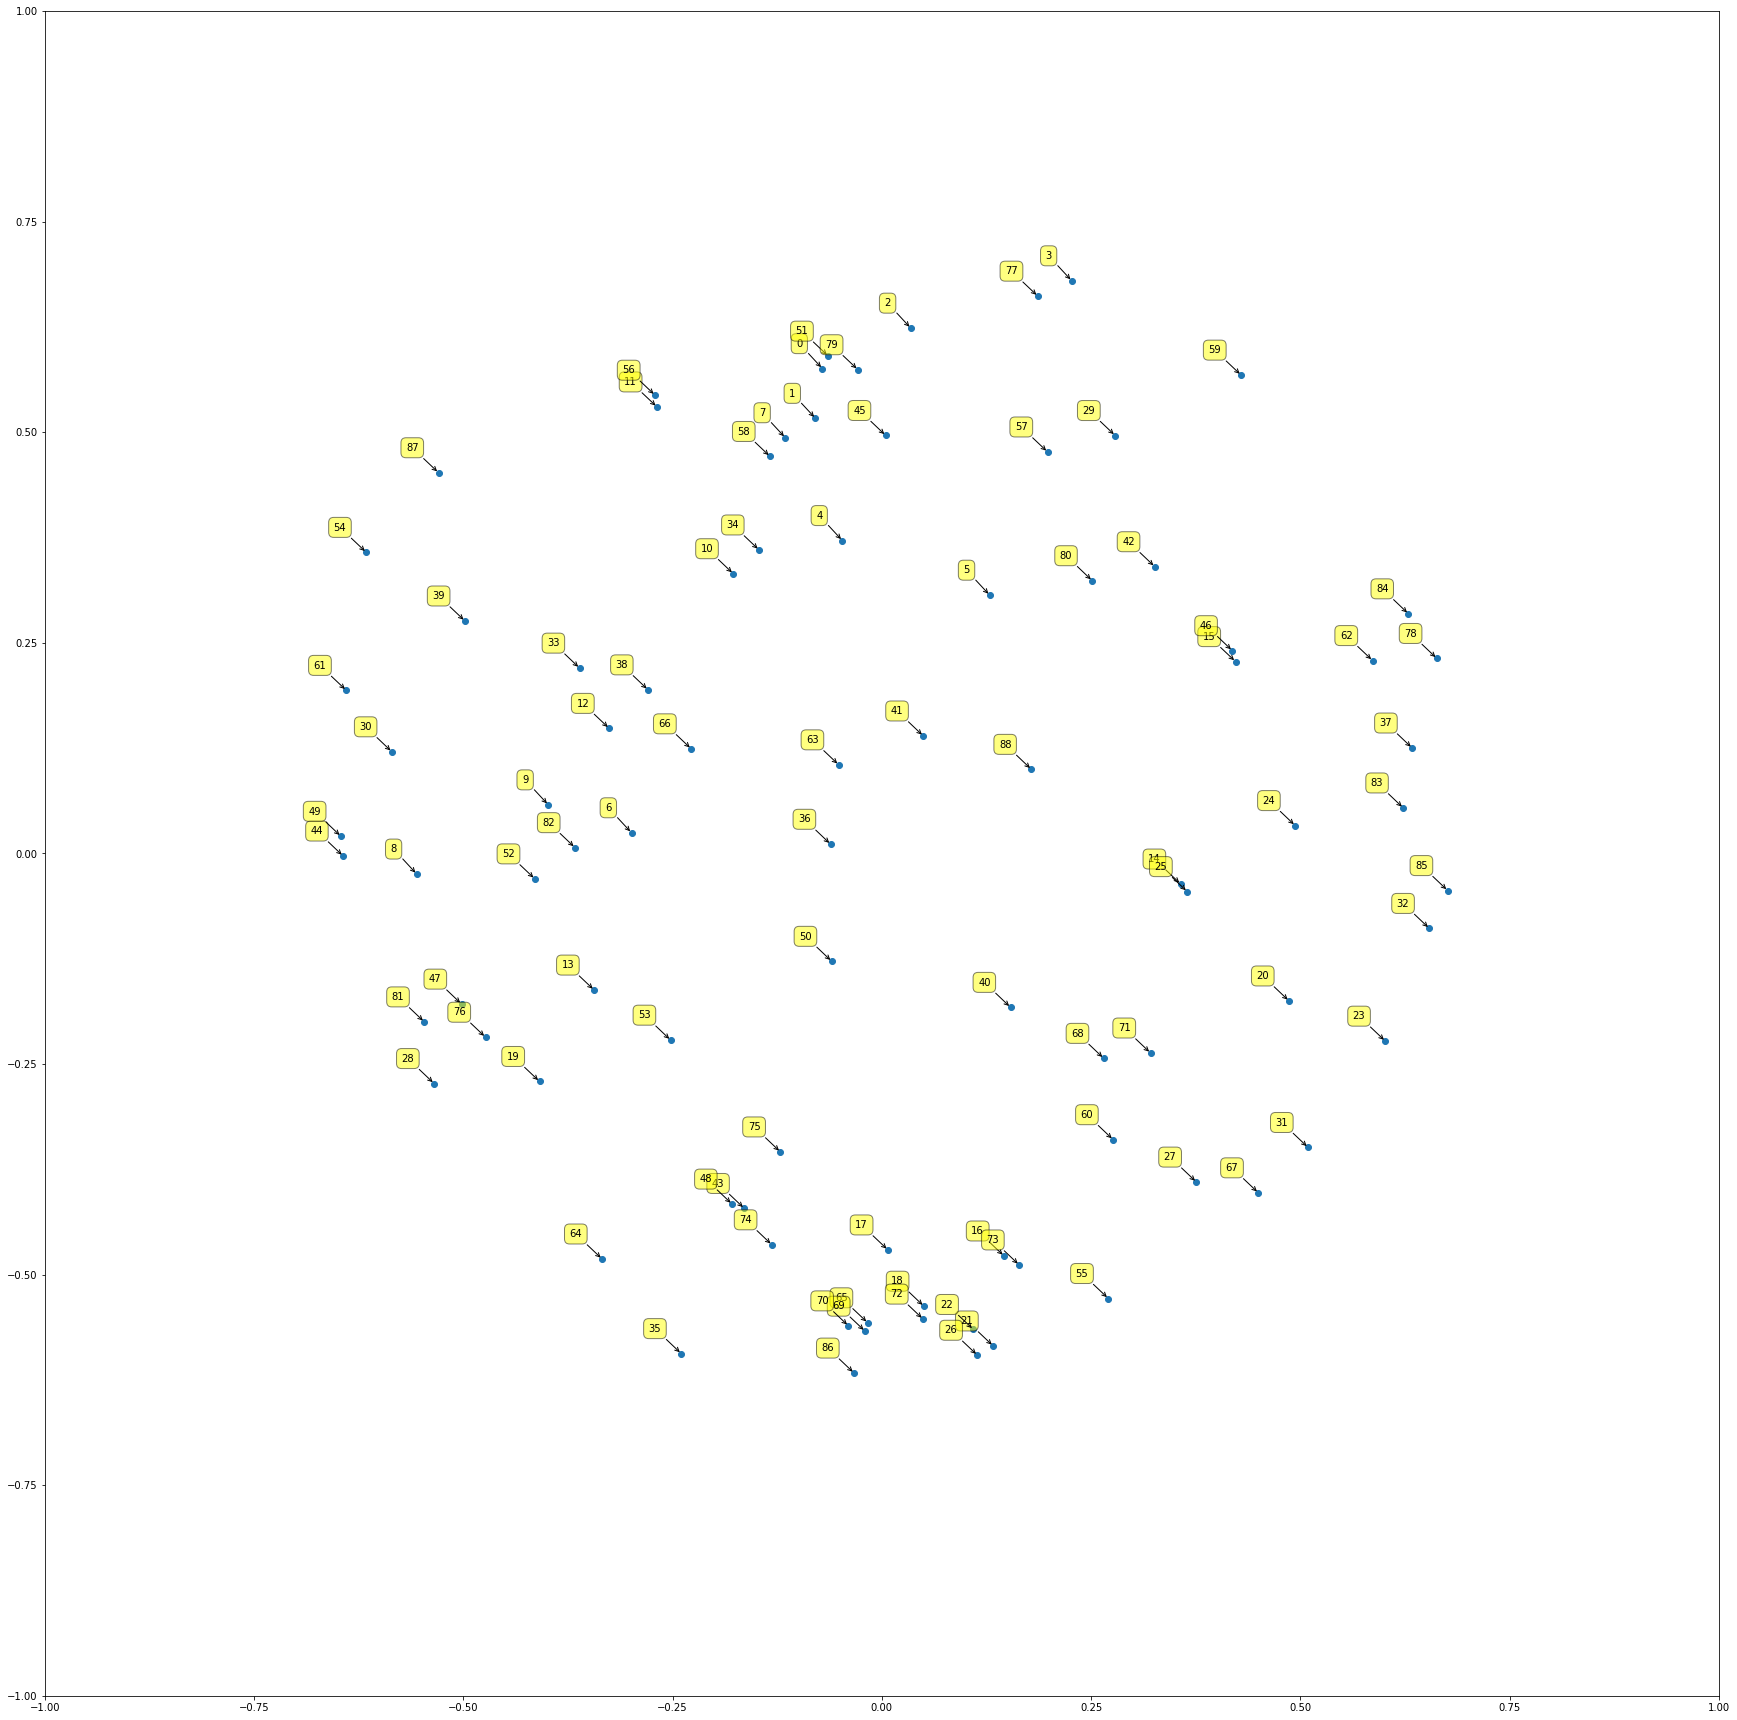

In [208]:
# loads data (4)

dists = distanceMatrix
cities = []
for i in range(len(distanceMatrix)):
    cities.append(i)
    #dists.append(map(float , d[1:-1]))

adist = distanceMatrix
amax = np.amax(adist)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.figure(figsize=(30,30))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

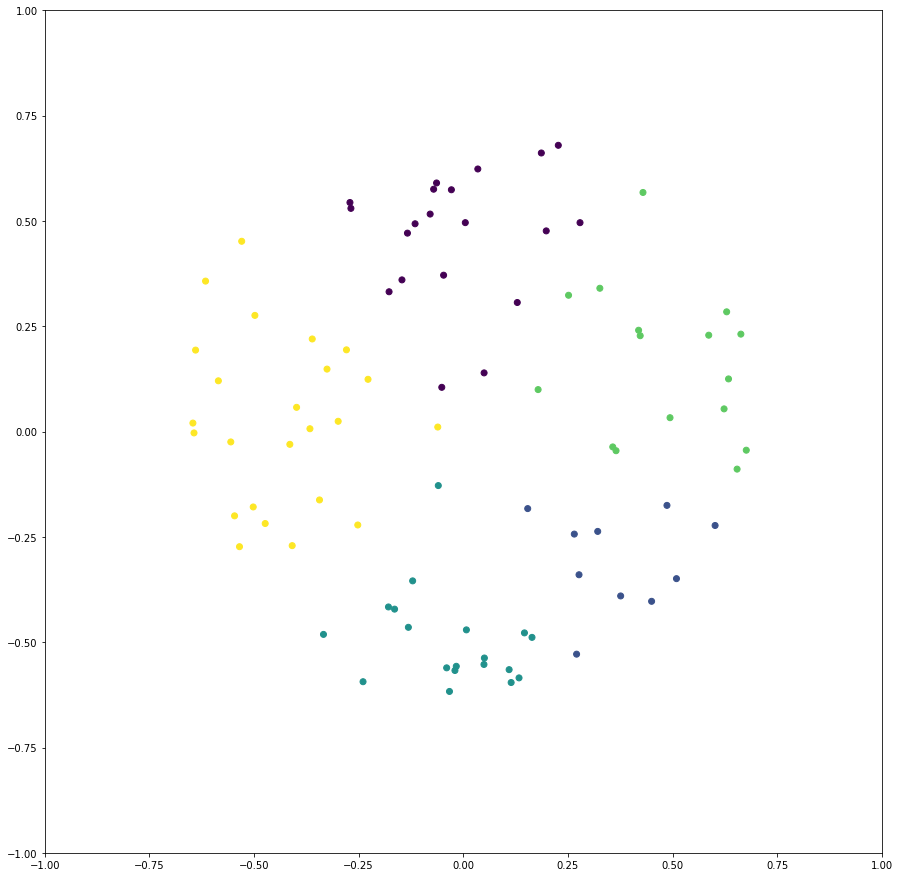

In [210]:
kmeansList = np.asarray(coords)

kmeans = KMeans(n_clusters=5, random_state=0).fit(kmeansList)
kmeans_pred = KMeans(n_clusters=2, random_state=0).fit_predict(kmeansList)
plt.figure(figsize=(15,15))
plt.axis([-1, 1, -1, 1])
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c = kmeans.labels_
    )


plt.show()

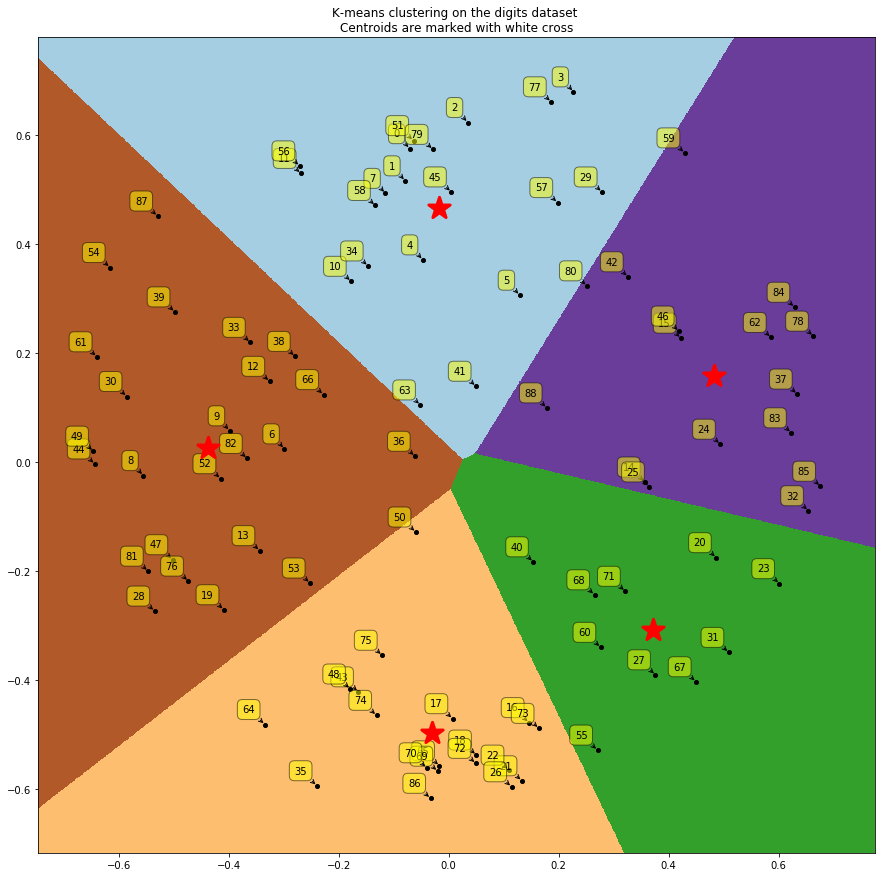

In [211]:
reduced_data = coords
h = .001     


# Plot the decision boundary. For color

x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(15,15))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=8)


# Plot the centroids as a white X

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=500, linewidths=3,
            color='r', zorder=10)
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

        
plt.title('K-means clustering on the digits dataset \n'
          'Centroids are marked with white cross')


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

***Purity of the topic***

In [227]:
kmeansDict = {}
kmeansTopics = []
for i in range(5):
    kmeansDict[i] = []
    kmeansTopics.append([0]*7)
    
for ind, lab in enumerate(kmeans.labels_):
    kmeansDict[lab].append(ind)

for key, docs in kmeansDict.items():
    for d in docs:
        mx = 0
        mxInd = 0
        for t in lda.get_document_topics(lda[corpus[d]]):
            if t[1] > mx:
                mx = t[1]
                mxInd = t[0]
        kmeansTopics[key][mxInd] = kmeansTopics[key][mxInd] + mx    
t='bollywood\nnarendramodi\nindiavssouthafrica\ntrumph\nmachine_learning'  
print(t)
for i, clusters in enumerate(kmeansTopics):
    clusters = [c/sum(clusters) for c in clusters]
    kmeansTopics[i] = clusters
    print(max(kmeansTopics[i])*100)
        
#centerLabels = [np.argmax(kT) for kT in kmeansTopics]


bollywood
narendramodi
indiavssouthafrica
trumph
machine_learning
50.18111685080652
70.62553478012819
68.90675133941947
55.71812656761288
50.47079161895757


In [228]:
centerLabels = [np.argmax(kT) for kT in kmeansTopics]
print(centerLabels)  


[0, 4, 4, 0, 4]


# TF-IDF

***Use tf-idf features for NMF***

In [121]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")

tfidf_vectorizer = TfidfVectorizer(max_features=n_features)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(tweetList)
#print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...


*** Fit the NMF model***

In [124]:
# Fit the NMF model
print("Fitting the NMF model with tf-idf features, " "n_samples=%d and n_features=%d..." % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


Fitting the NMF model with tf-idf features, n_samples=89 and n_features=11106...
done in 0.498s.


***Use tf (raw term count) features for LDA***